In [ ]:
#Librerias.
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Datos.
from google.colab import files
uploaded = files.upload()

Saving 0000.dat to 0000.dat


(0.0, 400.0)

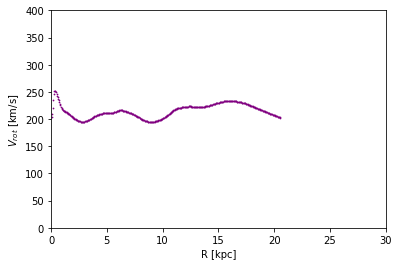

In [ ]:
#Datos.
radio,velc = np.loadtxt("0000.dat",usecols=(0,1),unpack=True,comments="#") # radio(r) = [kpc] & Velocidad(Vr) = [Km/s]

#Constante.
global G
G = 6.67384E-11*1.9891E30*(1.0001044887813144157/3.086e19)**3 #[kpc^3/(Msun*s^3)]

#Cambio de unidad a las velocidades.
Velc=velc*(1.0001044887813144157/3.086e16) #[kpc/s]

#Radios.
R = np.linspace(radio[1],radio[-1],num=len(radio))  #[kpc]

#Grafica.
plt.plot(R,Velc*(3.086e16/1.0001044887813144157), ".",  markersize=1.5, color="purple")
#plt.title("NGC 4569")
plt.xlabel("R [kpc]")
plt.ylabel("$V_{rot}$ [km/s]")
#plt.savefig("NGC 4569.png")
plt.xlim(0,30)
plt.ylim(0,400)

### Asumiendo que la galaxia está dominada solo por el Halo:

Para este caso, se tiene en cuenta que el halo de materia oscura sigue un perfil de densidad de Hernquist. Por lo cual, la ecuación de la velocidad circular está dada por:

$v_{c}^{2} = \frac{2 \pi GR \rho_{0}a^{3}}{(a+R)^{2}}$

Donde: $G$ es la constante de gravitación universal, $R$ es el radio, $\rho_{0}$ es la densidad caracteritica del halo de materia oscura y $a$ es el factor de escala. 

(Formulas Perfil de Hernquist)

$\rho(r) = \frac{M}{2\pi}\frac{a}{r(r+a)^{3}}$

$\phi(r) = -\frac{GM}{r+a}$

$M(r) = \frac{Mr^{2}}{(r+a)^{2}}$

Para encontrar tanto la densidad del halo como el factor se hizo un ajuste de los datos dados por medio de curve_fit:

In [ ]:
#Definimos la velocidad circular al cuadrado.
def Halo(r,rho_0,a):
    vc2 = 2.0*np.pi*G*rho_0*a**3*r/((a+r)**2.0) 
    return vc2

#Ajuste curve_fit
#popt, pcov = curve_fit(Vc_halo, R, V)
#Curve_fit devuelve dos resultados: El primero (popt) son los parámetros óptimos hallados. 
#El segundo (pcov) es la matriz de covarianza de los parámetros hallados.
fitHalo, fitHalopcov = curve_fit(Halo, R, Velc**2)

#Densidad.
rho_Halo = fitHalo[0]

#Factor de escala.
a = fitHalo[1]

In [ ]:
print("Densidad caracteristica del halo de materia oscura",np.format_float_scientific(rho_Halo, precision = 2, exp_digits=2),"M๏/kpc^3")
print("Factor de escala del halo de materia oscura",a,"kpc")

Densidad caracteristica del halo de materia oscura 1.26e+08 M๏/kpc^3
Factor de escala del halo de materia oscura 7.759410041041955 kpc


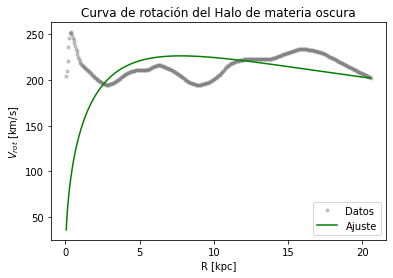

In [ ]:
#Grafica.
plt.plot(R,Velc*(3.086e16/1.0001044887813144157), ".", color="gray", alpha=0.4, label="Datos")
plt.plot(R,np.sqrt(Halo(R,rho_Halo,a))*(3.086e16/1.0001044887813144157), color="green", label="Ajuste")
plt.title("Curva de rotación del Halo de materia oscura")
plt.xlabel("R [kpc]")
plt.ylabel("$V_{rot}$ [km/s]")
plt.legend(loc = 4)
plt.savefig("0000_halo.png")

In [ ]:
Velc*(3.086e16/1.0001044887813144157)

In [ ]:
np.sqrt(Halo(R,rho_Halo,a))*(3.086e16/1.0001044887813144157)

In [ ]:
max(R)

23.3

### Asumiendo que la galaxia está dominada solo por el Disco:

Para este caso, se tiene en asume un disco exponencial. Por lo cual, la ecuación de la velocidad circular está dada por:

$v_{c}^{2} = 4\pi G \Sigma_{0}R_{d}y^{2}[I_{0}(y)K_{0}(y)-I_{1}(y)K_{1}(y)]$

Donde: G es la constante de gravitación universal, $\Sigma_{0}$ es la densidad superficial del disco, $R_{d} = h$ es la longitud de escala del disco y $I_{0}$,$K_{0}$,$I_{1}$,$K_{1}$ son las funciones especiales de Bessel.

In [ ]:
#Definimos la velocidad circular al cuadrado.
def Disk( r, Rd, Sigma0 ):
    Vc2 = np.pi*G*Sigma0*r*(r/Rd)*(special.iv(0,r/(2.0*Rd))*special.kv(0,r/(2.0*Rd))-special.iv(1,r/(2.0*Rd))*special.kv(1,r/(2.0*Rd)))
    return Vc2

#Ajuste curve_fit.
fitdisco, fitdiscopcov= curve_fit(Disk, R, Velc**2.)

#Longitud de escala.
Rd = fitdisco[0]

#Densidad superficial.
Sigma0_d = fitdisco[1]

In [ ]:
print("Densidad superficial del Disco",np.format_float_scientific(Sigma0_d, precision = 2, exp_digits=2),"M๏/kpc^3")
print("Longitud de escala del Disco",Rd,"kpc")

Densidad superficial del Disco 1.12e+09 M๏/kpc^3
Longitud de escala del Disco 4.598265854140442 kpc


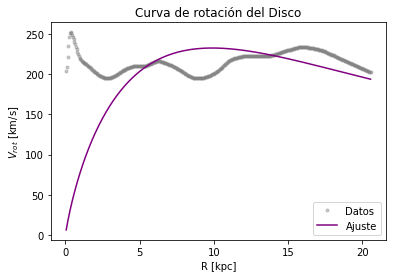

In [ ]:
#Grafica.
plt.plot(R,Velc*(3.086e16/1.0001044887813144157),".", color="gray", alpha=0.4, label="Datos")
plt.plot(R,np.sqrt(Disk(R,fitdisco[0],fitdisco[1]))*(3.086e16/1.0001044887813144157), color="purple", label="Ajuste")
plt.title("Curva de rotación del Disco")
plt.xlabel("R [kpc]")
plt.ylabel("$V_{rot}$ [km/s]")
plt.legend(loc = 4)
plt.savefig("0000_disco.png")

### Curva de rotación para toda la galaxia.

In [ ]:
#Definimos las velocidades circulares al cuadrado.
def galaxy(r,rho_0,a,sigma0,Rd):
    VcH2 = 2.0*np.pi*G*rho_0*(a**3)*r/((a+r)*(a+r))
    VcD2 = np.pi*G*sigma0*r*(r/Rd)*(special.iv(0,r/(2.0*Rd))*special.kv(0,r/(2.0*Rd))-special.iv(1,r/(2.0*Rd))*special.kv(1,r/(2.0*Rd)))
    #Velocidad de la galaxia = suma de las velocidades del halo y del discos.
    VcGalaxy2 = VcH2+VcD2
    return VcGalaxy2

#Ajuste curve_fit.
fitgalaxy, fitgalaxycov = curve_fit(galaxy, R, Velc**2)

#Densidad caracteristica.
rho_galaxy = fitgalaxy[0]

#Factor de escala.
a_galaxy = fitgalaxy[1]

#Densidad superficial.
sigma0_galaxy = fitgalaxy[2]

#Longitud de escala.
Rd_galaxy = fitgalaxy[3]

#Definimos velocidades.
#Galaxia.
VcG = np.sqrt(galaxy(R,rho_galaxy,a_galaxy,sigma0_galaxy,Rd_galaxy))*(3.086e16/1.0001044887813144157)
#Halo.
VcH = np.sqrt(Halo(R,rho_galaxy,a_galaxy))*(3.086e16/1.0001044887813144157)
#Disco.
VcD = np.sqrt(Disk(R,Rd_galaxy,sigma0_galaxy))*(3.086e16/1.0001044887813144157)

In [ ]:
print("Densidad caracteristica de toda la galaxia",np.format_float_scientific(rho_galaxy, precision = 2, exp_digits=2),"M๏/kpc^3")
print("Factor de escala de toda la galaxia",a,"kpc")
print("Longitud de escala de toda la galaxia",Rd_galaxy,"kpc")
print("Densidad superficial de toda la galaxia",np.format_float_scientific(sigma0_galaxy, precision = 2, exp_digits=2),"M๏/kpc^3")

Densidad caracteristica de toda la galaxia 3.11e+07 M๏/kpc^3
Factor de escala de toda la galaxia 7.759410041041955 kpc
Longitud de escala de toda la galaxia 0.18911623980123832 kpc
Densidad superficial de toda la galaxia 3.28e+10 M๏/kpc^3


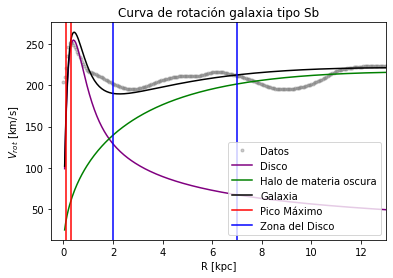

In [ ]:
#Grafica.
plt.plot(radio,velc, ".", color="gray", alpha=0.4, label="Datos")
plt.plot(R, VcD, color="purple",label="Disco")
plt.plot(R, VcH, color="green", label="Halo de materia oscura")
plt.plot(R, VcG, color="black", label="Galaxia")
plt.title("Curva de rotación galaxia tipo Sb")
plt.xlabel("R [kpc]")
plt.ylabel("$V_{rot}$ [km/s]")

#Líneas por zonas.
plt.axvline(0.1, color="red", label="Pico Máximo")
plt.axvline(0.3, color="red")
plt.axvline(2, color="blue", label="Zona del Disco")
plt.axvline(7, color="blue")
plt.xlim(-0.5,13)
plt.legend(loc = 4)
plt.savefig("0000_analisis.png")
